In [14]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
mh = pd.read_csv('../Data/mental_health.csv')

In [4]:
mh.head(5)

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
0,20-25,Female,Corporate,1-14 days,Yes,Yes,No,Yes,Yes,Medium,No,No,Yes
1,30-Above,Male,Others,31-60 days,Yes,Yes,Maybe,No,No,High,No,No,Yes
2,30-Above,Female,Student,Go out Every day,No,No,Yes,No,No,Medium,Yes,Maybe,No
3,25-30,Male,Others,1-14 days,Yes,No,Maybe,No,Maybe,Medium,No,Maybe,Yes
4,16-20,Female,Student,More than 2 months,Yes,Yes,Yes,No,Yes,Medium,Yes,Maybe,No


In [6]:
mh.tail(5)

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
819,20-25,Male,Corporate,Go out Every day,No,Yes,No,Yes,Yes,Medium,No,Yes,Maybe
820,20-25,Male,Others,1-14 days,Yes,Yes,No,Yes,Maybe,Low,No,Maybe,Maybe
821,20-25,Male,Student,More than 2 months,Yes,Maybe,Maybe,No,Yes,High,Yes,Yes,Maybe
822,16-20,Male,Business,15-30 days,No,No,Maybe,No,Maybe,Low,Yes,No,Maybe
823,30-Above,Female,Others,15-30 days,No,No,No,No,Yes,Low,Yes,No,Maybe


In [7]:
mh.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      824 non-null    object
 1   Gender                   824 non-null    object
 2   Occupation               824 non-null    object
 3   Days_Indoors             824 non-null    object
 4   Growing_Stress           824 non-null    object
 5   Quarantine_Frustrations  824 non-null    object
 6   Changes_Habits           824 non-null    object
 7   Mental_Health_History    824 non-null    object
 8   Weight_Change            824 non-null    object
 9   Mood_Swings              824 non-null    object
 10  Coping_Struggles         824 non-null    object
 11  Work_Interest            824 non-null    object
 12  Social_Weakness          824 non-null    object
dtypes: object(13)
memory usage: 83.8+ KB


In [8]:
mh.isna().sum()

Age                        0
Gender                     0
Occupation                 0
Days_Indoors               0
Growing_Stress             0
Quarantine_Frustrations    0
Changes_Habits             0
Mental_Health_History      0
Weight_Change              0
Mood_Swings                0
Coping_Struggles           0
Work_Interest              0
Social_Weakness            0
dtype: int64

In [11]:
#summary
mh.describe()

,Age,Gender,Occupation,Days_Indoors,Growing_Stress,Quarantine_Frustrations,Changes_Habits,Mental_Health_History,Weight_Change,Mood_Swings,Coping_Struggles,Work_Interest,Social_Weakness
count,824,824,824,824,824,824,824,824,824,824,824,824,824
unique,4,2,5,5,3,3,3,3,3,3,2,3,3
top,30-Above,Female,Housewife,31-60 days,Yes,Yes,Yes,No,Maybe,Medium,No,No,Maybe
freq,222,434,185,171,301,304,305,284,281,280,414,295,287


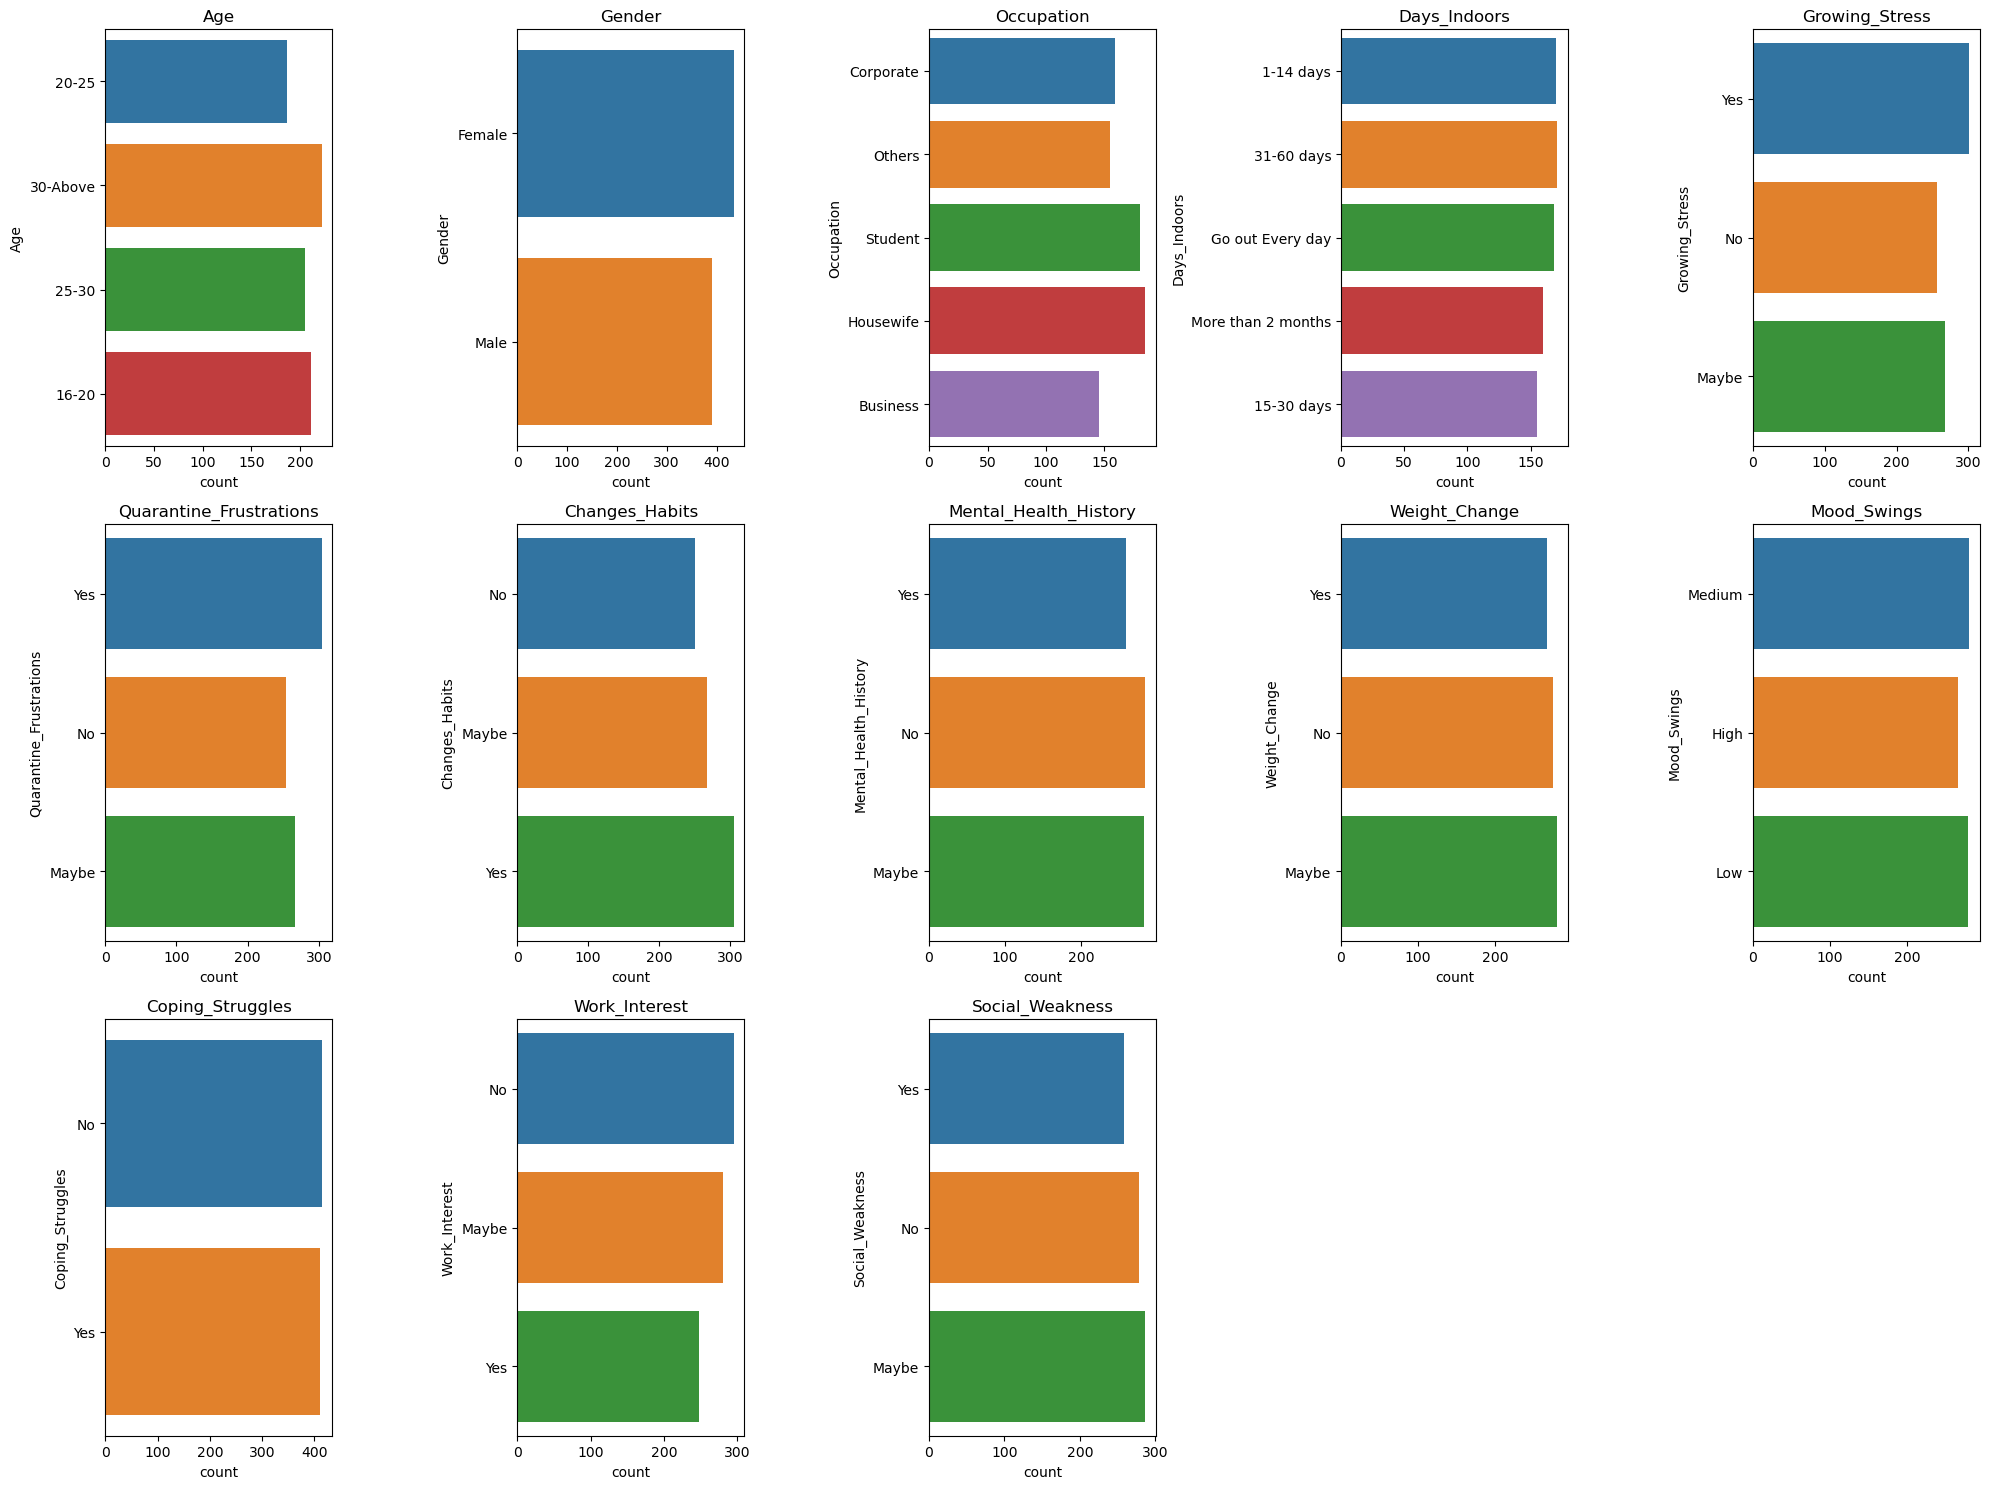

In [19]:
# Count plot for categorical variables
plt.figure(figsize=(20, 15))

categorical_cols = ['Age', 'Gender', 'Occupation', 'Days_Indoors', 'Growing_Stress',
                    'Quarantine_Frustrations', 'Changes_Habits', 'Mental_Health_History',
                    'Weight_Change', 'Mood_Swings', 'Coping_Struggles', 'Work_Interest', 'Social_Weakness']

for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(3, 5, i)
    sns.countplot(data=mh, y=col)
    plt.title(col)

plt.tight_layout()
plt.show()

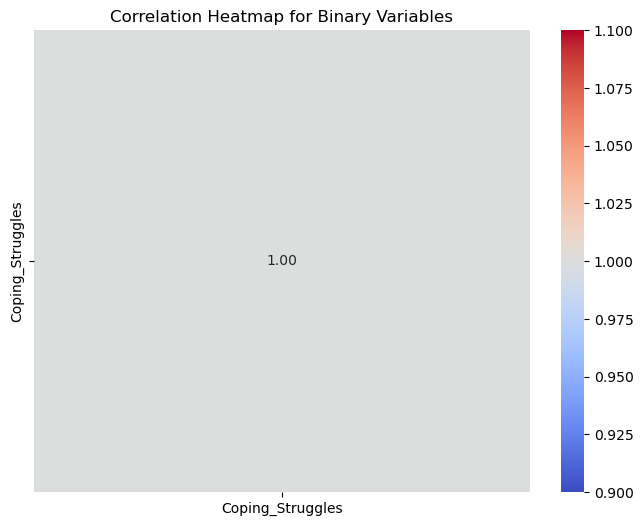

In [21]:
#correlation heatmap for binary variables

binary_columns = ['Growing_Stress', 'Quarantine_Frustrations', 'Changes_Habits',
                 'Mental_Health_History', 'Weight_Change', 'Coping_Struggles',
                 'Work_Interest', 'Social_Weakness']

binary_data = mh[binary_columns].replace({'Yes': 1, 'No': 0})

plt.figure(figsize=(8, 6))
sns.heatmap(binary_data.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap for Binary Variables')
plt.show()

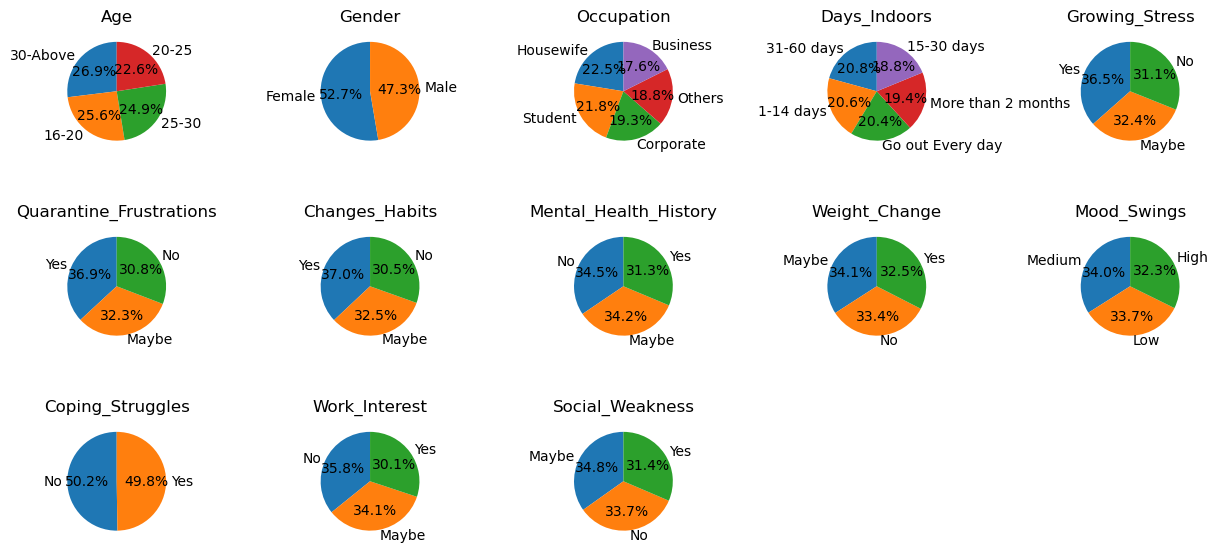

In [23]:
plt.figure(figsize=(12, 6))

for i, col in enumerate(categorical_cols, start=1):
    plt.subplot(3, 5, i)
    mh[col].value_counts().plot(kind='pie', autopct='%1.1f%%', startangle=90)
    plt.title(col)
    plt.ylabel('')

plt.tight_layout()
plt.show()

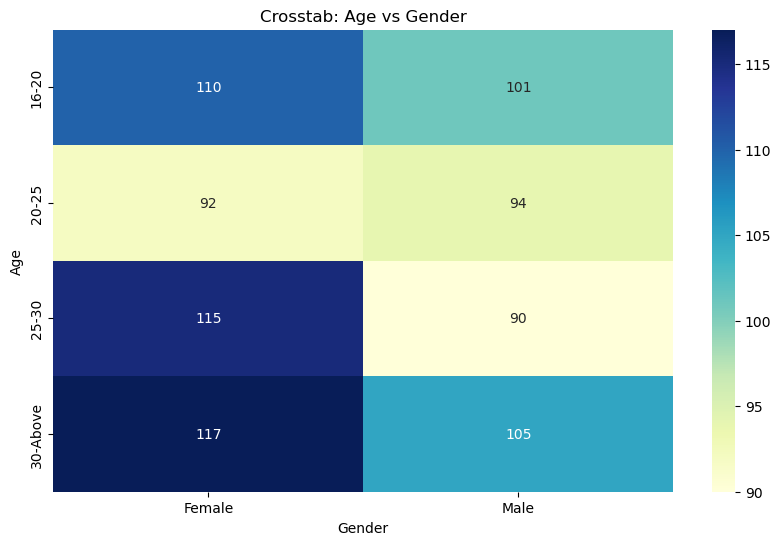

In [24]:
# Crosstab for relationship between categorical variables
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(mh['Age'], mh['Gender']), annot=True, cmap='YlGnBu', fmt='d')
plt.title('Crosstab: Age vs Gender')
plt.xlabel('Gender')
plt.ylabel('Age')
plt.show()